# DonorsChoose



<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>


## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.


### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>



In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
import os
# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

### importing file into googel colab 

In [0]:
#  resources data
import gdown

url = 'https://drive.google.com/uc?id=1OcMV5zjAJI7OvNxxN4Ant52BDF3jrZOZ'
output = 'resources.csv'
# https://drive.google.com/file/d/1OcMV5zjAJI7OvNxxN4Ant52BDF3jrZOZ/view?usp=sharing
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1OcMV5zjAJI7OvNxxN4Ant52BDF3jrZOZ
To: /content/resources.csv
127MB [00:01, 110MB/s] 


'resources.csv'

In [0]:
# test data
import gdown

url = 'https://drive.google.com/uc?id=1JGtsNLea4Q2HZQIgBp3pRrOfRN80qIg0'
# https://drive.google.com/file/d/1JGtsNLea4Q2HZQIgBp3pRrOfRN80qIg0/view?usp=sharing
output = 'train_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JGtsNLea4Q2HZQIgBp3pRrOfRN80qIg0
To: /content/train_data.csv
201MB [00:01, 163MB/s]


'train_data.csv'

In [0]:
ls

resources.csv  sample_data/  train_data.csv


In [0]:
project_data =pd.read_csv("train_data.csv")
resource_data = pd.read_csv("resources.csv")

In [0]:
print("The shape of the Train data ",project_data.shape)
print("-"*50)
print("The number of attributes in Train data","-"*5,project_data.columns.values)

The shape of the Train data  (109248, 17)
--------------------------------------------------
The number of attributes in Train data ----- ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
cols = ["Date" if x=="project_submitted_datetime" else x for x in list(project_data.columns)]
project_data["Date"] = pd.to_datetime(project_data["project_submitted_datetime"])
project_data.drop("project_submitted_datetime",axis=1,inplace = True )
project_data.sort_values(by=["Date"],inplace=True)

project_data = project_data[cols]
project_data.head(2)

In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [0]:
# we cannot remove rows where teacher prefix is not available therefore we are replacing 'nan' value with
# 'null'(string)
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

## 1.2 preprocessing of project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&",\
#             "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip().lower())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print("The Worlds in sorted_cat_dict",sorted_cat_dict)

## 1.3 preprocessing of project_subject_subcategories

In [0]:
catogories1 = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list1 = []
for i in catogories1:
    temp1 = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&",\
#             "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp1+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp1 = temp1.replace('&','_') # we are replacing the & value into 
    cat_list1.append(temp1.strip().lower())
    
project_data['clean_sub_categories'] = cat_list1
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

from collections import Counter
my_counter1 = Counter()
for word in project_data['clean_sub_categories'].values:
    my_counter1.update(word.split())

cat_dict1 = dict(my_counter1)
sorted_cat_dict1 = dict(sorted(cat_dict1.items(), key=lambda kv: kv[1]))
print("The Worlds in sorted_cat_dict1",sorted_cat_dict1)

## 1.4 Text preprocessing of project essay 

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:02<00:00, 1735.10it/s]


In [0]:
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

## 1.5 Preprocessing of project_title

In [0]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 38487.54it/s]


In [0]:
preprocessed_titles[1000]

'empowering students through art learning about then now'

In [0]:
# here we are removing the unwanted coloumns from the data that has been processed .
project_data["clean_titles"] = preprocessed_titles
project_data.drop(["project_essay_1"],axis=1,inplace=True)
project_data.drop(["project_essay_2"],axis=1,inplace=True)
project_data.drop(["project_essay_3"],axis=1,inplace=True)
project_data.drop(["project_essay_4"],axis=1,inplace=True)
project_data.drop(["project_title"],axis=1,inplace=True)

## 1.6 Merging the tow DataFrame (Resources.csv and Train.csv)

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_sub_categories', 'essay', 'clean_titles'],
      dtype='object')

In [0]:
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [0]:
price_data= resource_data.groupby("id").agg({"price" : "sum" , "quantity" : "sum"}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [0]:
project_data = pd.merge(project_data,price_data,on="id",how = "left")
project_data.head(2)
# project_data.drop(["Unnamed: 0"],axis=1,inplace=True)
# project_data.drop(["id"],axis=1,inplace=True)
# project_data.drop(["teacher_id"],axis=1,inplace=True)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,clean_titles,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,My students need STEM kits to learn critical s...,53,1,math_science,appliedsciences health_lifescience,I have been fortunate enough to use the Fairy ...,engineering steam primary classroom,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,My students need Boogie Boards for quiet senso...,4,1,specialneeds,specialneeds,Imagine being 8-9 years old. You're in your th...,sensory tools focus,213.03,8


## 1.7 Preprocessing of school_state

In [0]:
school_state = list(project_data['school_state'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

school_state_list = []
for i in school_state:
    temp2 = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=>"Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp2 +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp2 = temp2.replace('&','_')
    school_state_list.append(temp2.strip().lower())

# droping the school_state column 
project_data['School_state'] = school_state_list
project_data.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter3 = Counter()
for word in project_data['School_state'].values:
    my_counter3.update(word.split())
    
school_state_dict = dict(my_counter3)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
print("The Values in sorted_school_state_dict : ", sorted_school_state_dict)



## 2.1 Splitting data

In [0]:
project_data = project_data.head(50000)
Y = project_data["project_is_approved"].values
X = project_data.drop(["project_is_approved"],axis = 1)
print(X.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'Date',
       'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'clean_titles', 'price', 'quantity',
       'School_state'],
      dtype='object')


In [0]:
#Splitting the data into train and test data_set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.33, stratify=Y_train)

## 2.2  Resampling data using the Randomover sampler for Imblearn.over sampling 

In [0]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
x_train, y_train = ros.fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(y_train))
print("Capitial" ,"X","represents the original train_data and lower case" ,"x", "represnts the ramdonly over-sampled data")

Resampled dataset shape Counter({1: 18850, 0: 18850})
Capitial X represents the original train_data and lower case x represnts the ramdonly over-sampled data


In [0]:
# here we have to convert x into a dataframe 
x_train = pd.DataFrame(x_train,columns = X.columns)
x_train.head(1)

In [0]:
print(x_train.shape, y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)


(37700, 15) (37700,)
(11055, 15) (11055,)
(16500, 15) (16500,)


## 2.3 Make Data Model Ready: Vectorizing data

### Bag of Words is used for Vectorizing of Text data

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_features=2000)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

# we use the transform Text_data to vector , BOW CountVectorizer
x_train_essay_bow = vectorizer.transform(x_train['essay'].values) # this the vectorization of the oversampled data we do it as we dont want a baised model 
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)  # here we use the X_CV for vectorization( only x_train is oversampled)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("="*100)
print("After vectorizations of the text data the shape of the data is ")
print(x_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, Y_cv.shape)
print(X_test_essay_bow.shape, Y_test.shape)




After vectorizations of the text data the shape of the data is 
(37700, 2000) (37700,)
(11055, 2000) (11055,)
(16500, 2000) (16500,)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_features=2000)
vectorizer.fit(x_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_titles_bow = vectorizer.transform(x_train['clean_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations of the clean_titles data the shape of the data is")
print(x_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, Y_cv.shape)
print(X_test_titles_bow.shape, Y_test.shape)
print("*"*100)

After vectorizations of the clean_titles data the shape of the data is
(37700, 1817) (37700,)
(11055, 1817) (11055,)
(16500, 1817) (16500,)
****************************************************************************************************


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_features=2000)
vectorizer.fit(x_train['project_resource_summary']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_summary_bow = vectorizer.transform(x_train['project_resource_summary'])
X_cv_summary_bow = vectorizer.transform(X_cv['project_resource_summary'])
X_test_summary_bow = vectorizer.transform(X_test['project_resource_summary'])

print("After vectorizations of the project_resource_summary data the shape of the data is")
print(x_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, Y_cv.shape)
print(X_test_summary_bow.shape, Y_test.shape)
print("*"*100)

After vectorizations of the project_resource_summary data the shape of the data is
(37700, 2000) (37700,)
(11055, 2000) (11055,)
(16500, 2000) (16500,)
****************************************************************************************************


## 2.4  One-hot-encoding of the Catogorical Features 

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_sub_categories']) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_subcat_ohe = vectorizer.transform(x_train['clean_sub_categories'])
X_cv_clean_subcat_ohe = vectorizer.transform(X_cv['clean_sub_categories'])
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_sub_categories'])

print("After vectorizations of the clean_sub_categories , One-hot-encoding shape of the data is")
print(x_train_clean_subcat_ohe.shape, y_train.shape)
print(X_cv_clean_subcat_ohe.shape, Y_cv.shape)
print(X_test_clean_subcat_ohe.shape, Y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

After vectorizations of the clean_sub_categories , One-hot-encoding shape of the data is
(37700, 30) (37700,)
(11055, 30) (11055,)
(16500, 30) (16500,)
****************************************************************************************************


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories']) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_categories_ohe = vectorizer.transform(x_train['clean_categories'])
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'])
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'])

print("After vectorizations of the clean_categories, One-hot-encoding shape of the data is")
print(x_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, Y_cv.shape)
print(X_test_clean_categories_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("*"*100)

After vectorizations of the clean_categories, One-hot-encoding shape of the data is
(37700, 9) (37700,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
****************************************************************************************************


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(x_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations of the teacher_prefix , One-hot-encoding shape of the data is")
print(x_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, Y_cv.shape)
print(X_test_teacher_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("*"*100)


After vectorizations of the teacher_prefix , One-hot-encoding shape of the data is
(37700, 6) (37700,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']
****************************************************************************************************


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['School_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(x_train['School_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['School_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['School_state'].values)

print("After vectorizations of the School_state , One-hot-encoding shape of the data is")
print(x_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, Y_cv.shape)
print(X_test_state_ohe.shape, Y_test.shape)
# print(vectorizer.get_feature_names())
print("="*100)

After vectorizations of the School_state , One-hot-encoding shape of the data is
(37700, 51) (37700,)
(11055, 51) (11055,)
(16500, 51) (16500,)


In [0]:
# #This step is to intialize a vectorizer with the vocabulary created form the project_grade_category values 
from collections import Counter
my_counter5 = Counter()
for word in X_train['project_grade_category'].values:
  if "Grades" in word:
    word = word.replace("Grades","")
  my_counter5.update(word.split())  
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_category_dict = dict(my_counter5)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))
print(sorted_project_grade_category_dict)

{'9-12': 2137, '6-8': 3407, '3-5': 7595, 'PreK-2': 9306}


In [0]:
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer.transform(x_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations of the project_grade_category , One-hot-encoding shape of the data is")
print(x_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, Y_cv.shape)
print(X_test_grade_ohe.shape,Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations of the project_grade_category , One-hot-encoding shape of the data is
(37700, 4) (37700,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['9-12', '6-8', '3-5', 'PreK-2']


## 2.5 Normalizing the numerical features: Price

In [0]:
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(x_train['price'].values.reshape(-1,1))

x_train_price_std = standard_vec.transform(x_train['price'].values.reshape(-1,1))
X_cv_price_std = standard_vec.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = standard_vec.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations of the price data ,  shape of the data after standazing")
print(x_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, Y_cv.shape)
print(X_test_price_std.shape, Y_test.shape)
print("="*100)

After vectorizations of the price data ,  shape of the data after standazing
(37700, 1) (37700,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [0]:
from sklearn.preprocessing import StandardScaler
standard_vector = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vector.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_projects_std = standard_vector.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = standard_vector.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = standard_vector.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations of the teacher_number_of_previously_posted_projects , shape of the data after standazing")
print(x_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape,Y_cv.shape)
print(X_test_projects_std.shape, Y_test.shape)
print("="*100)

After vectorizations of the teacher_number_of_previously_posted_projects , shape of the data after standazing
(37700, 1) (37700,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [0]:
from sklearn.preprocessing import StandardScaler
standard_vector1 = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vector1.fit(x_train['quantity'].values.reshape(-1,1))

x_train_qty_std = standard_vector1.transform(x_train['quantity'].values.reshape(-1,1))
X_cv_qty_std = standard_vector1.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_qty_std = standard_vector1.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_qty_std.shape, y_train.shape)
print(X_cv_qty_std.shape, Y_cv.shape)
print(X_test_qty_std.shape, Y_test.shape)
print("="*100)

After vectorizations
(37700, 1) (37700,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## 3 Appling KNN on different kind of featurization ("BOW" and "TFIDF" )


### 3.1  `**Set 1**`: Categorical Vectorised data , Numerical Vectorised data, Project_title(BOW) + Preprocessed_essay (BOW) 

In [0]:
from scipy.sparse import hstack
X1_tr = hstack((x_train_clean_categories_ohe,x_train_clean_subcat_ohe,x_train_teacher_ohe,x_train_state_ohe,\
                x_train_grade_ohe,x_train_titles_bow,x_train_essay_bow,x_train_price_std,x_train_projects_std,x_train_qty_std)).tocsr()
X1_cv = hstack((X_cv_clean_categories_ohe,X_cv_clean_subcat_ohe,X_cv_teacher_ohe,X_cv_state_ohe,X_cv_grade_ohe,\
                X_cv_price_std,X_cv_projects_std,X_cv_qty_std,X_cv_essay_bow,X_cv_titles_bow)).tocsr()
X1_te =hstack((X_test_clean_categories_ohe,X_test_clean_subcat_ohe,X_test_teacher_ohe,X_test_state_ohe,\
               X_test_grade_ohe,X_test_essay_bow,X_test_titles_bow,X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()


print("The final Data Matrix for Set:1" , " All the shapes of the data represent the merged features as mentioned in the tittle")
print("shape of X_train is : ",            X1_tr.shape)
print("shape of X_Cross validation is :" , X1_cv.shape)
print("shape of X_test is ",               X1_te.shape)

The final Data Matrix for Set:1  All the shapes of the data represent the merged features as mentioned in the tittle
shape of X_train is :  (37700, 3920)
shape of X_Cross validation is : (11055, 3920)
shape of X_test is  (16500, 3920)


In [0]:
def batch_predict(clf, data):
  y_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
  # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
  # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
      y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
  # we will be predicting for the last data points
  if data.shape[0]%1000 !=0:
      y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

  return y_data_pred

100%|██████████| 5/5 [23:24<00:00, 280.27s/it]


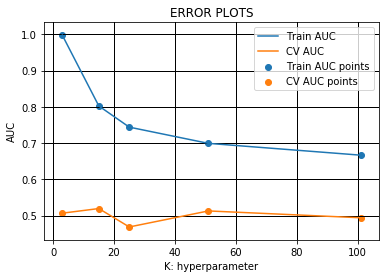

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X1_tr, y_train)

    y_train_pred = batch_predict(neigh, X1_tr)    
    y_cv_pred = batch_predict(neigh, X1_cv)

    # roc_auc_score(y_tr, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(Y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


1.   The error plot above representes the Train AUC and CV AUC Curve,      wherein we choose K(hyperparameter value) such that,it will be the  maximum AUC on cv data and distance between the train-data line("Blue") and CV-line("orange") results be to minimum.
2.   The best value of k is found to be 102
3.   Here I have used the "AUCROC" curve for choosing the best hypermeter as the data is imbalanced(though i have balanced it) , the "AUCROC" curve considers both the class labels equally . 
4.   The other hyperparameter tuning techiniques can also be choosen as "CV" and "K-fold CV"



In [0]:
best_k = 101

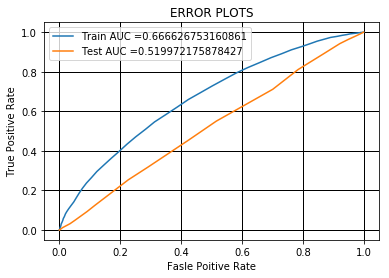

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X1_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X1_tr)    
y_test_pred = batch_predict(neigh, X1_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Fasle Poitive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

**Conclusion for SET : 1**

1.   The above Represents the TRP and FPR rates on the either axis and this curve is know as the AUCROC curve , it is a metrix to evaluate the performance of the model. 
2.   As the grap represents here the  Train Auc = 0.67 , so from this we can conclude that the model is predecting the values with 67 % probabilty.



In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


the maximum value of tpr*(1-fpr) 0.3806671404146937 for threshold 0.455
The Confusion metrix of train data


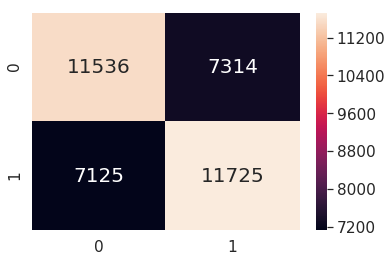

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Confusion_metrix_Train_data = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
Confusion_metrix_Test_data = pd.DataFrame(confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)))
import seaborn as sns
sns.set(font_scale=1.4)#for label size
print("The Confusion metrix of train data")
sns.heatmap(Confusion_metrix_Train_data,annot=True, annot_kws={"size": 20},fmt ="g")

The Confusion metrix of test data 


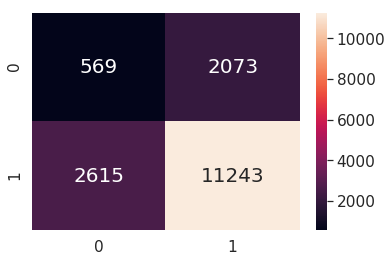

In [0]:
print("The Confusion metrix of test data ")
sns.heatmap(Confusion_metrix_Test_data,annot=True, annot_kws={"size": 20},fmt ="g")

1.   The Ouput Stated above represents the maximun value of TRP (i.e tpr*(1-fpr) "0.3944289258349809" corrosponding to whcih the maximum thershold is 0.48 .
2.   The Second output represnts the Confusion metrix Based on the thershold of 0.48 ,  which states that the values below the thershold of 0.48 are classified as 0 and the values above 0.48 are classified as 1.





### 3.2  `**Set 2**`: Categorical, Numerical features + Project_title(TFIDF)+ Preprocessed_essay (TFIDF)

In [0]:
# Applying TF-IDF on Prohect title :
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train["clean_titles"].values)

x_tain_project_titles_tfidf = vectorizer.transform(x_train["clean_titles"].values)
X_cv_project_titles_tfidf = vectorizer.transform(X_cv["clean_titles"].values)
X_test_project_titles_tfidf = vectorizer.transform(X_test["clean_titles"].values)


print("After TFIDF vectorizations of the clean_titles , shape of the data after standazing")
print(x_tain_project_titles_tfidf.shape, y_train.shape)
print(X_cv_project_titles_tfidf.shape,Y_cv.shape)
print(X_test_project_titles_tfidf.shape, Y_test.shape)
print("*"*100)

After TFIDF vectorizations of the clean_titles , shape of the data after standazing
(37700, 1817) (37700,)
(11055, 1817) (11055,)
(16500, 1817) (16500,)
****************************************************************************************************


In [0]:
# Applying the Tfidf Vectrization on Preprocessed_essay 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train["essay"])

x_tain_essay_tfidf = vectorizer.transform(x_train["essay"].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv["essay"].values)
X_test_essay_tfidf = vectorizer.transform(X_test["essay"].values)
 

print("After TFIDF vectorizations of the essay , shape of the data after standazing")
print(x_tain_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape,Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)
print("*"*100)

After TFIDF vectorizations of the essay , shape of the data after standazing
(37700, 11458) (37700,)
(11055, 11458) (11055,)
(16500, 11458) (16500,)
****************************************************************************************************


##### Creating new data-set for set -2 
##### Catogorial data , Numerical data , Essay(TFIDF) , Project_tittle(TFIDF)

In [0]:
# the data points are merged using the Hstack which we import from sklearn 
from scipy.sparse import hstack
X2_tr = hstack((x_train_clean_categories_ohe,x_train_clean_subcat_ohe,x_train_teacher_ohe,x_train_state_ohe,\
                x_train_grade_ohe,x_train_price_std,x_train_projects_std,x_train_qty_std,x_tain_project_titles_tfidf,x_tain_essay_tfidf)).tocsr()
X2_cv = hstack((X_cv_clean_categories_ohe,X_cv_clean_subcat_ohe,X_cv_teacher_ohe,X_cv_state_ohe,X_cv_grade_ohe,\
                X_cv_price_std,X_cv_projects_std,X_cv_qty_std,X_cv_project_titles_tfidf,X_cv_essay_tfidf)).tocsr()
X2_te =hstack((X_test_clean_categories_ohe,X_test_clean_subcat_ohe,X_test_teacher_ohe,X_test_state_ohe,\
               X_test_grade_ohe,X_test_price_std,X_test_projects_std,X_test_qty_std,X_test_project_titles_tfidf,X_test_essay_tfidf)).tocsr()


print("The final Data Matrix for Set:2" , " All the shapes of the data represent the merged features as mentioned in the tittle")
print("shape of X_train is : ",            X2_tr.shape)
print("shape of X_Cross validation is :" , X2_cv.shape)
print("shape of X_test is ",               X2_te.shape)

The final Data Matrix for Set:2  All the shapes of the data represent the merged features as mentioned in the tittle
shape of X_train is :  (37700, 13378)
shape of X_Cross validation is : (11055, 13378)
shape of X_test is  (16500, 13378)


In [0]:
def batch_predict(clf, data):
  y1_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
  # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
  # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
      y1_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
  # we will be predicting for the last data points
  if data.shape[0]%1000 !=0:
      y1_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

  return y1_data_pred

100%|██████████| 5/5 [27:50<00:00, 332.54s/it]


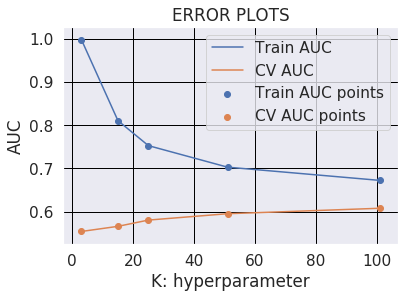

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc1 = []
cv_auc1 = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X2_tr, y_train)

    y1_train_pred = batch_predict(neigh, X2_tr)    
    y1_cv_pred = batch_predict(neigh, X2_cv)

    # roc_auc_score(y_tr, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc1.append(roc_auc_score(y_train,y1_train_pred))
    cv_auc1.append(roc_auc_score(Y_cv, y1_cv_pred))

plt.plot(K, train_auc1, label='Train AUC')
plt.plot(K, cv_auc1, label='CV AUC')

plt.scatter(K, train_auc1, label='Train AUC points')
plt.scatter(K, cv_auc1, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


1.   The error plot above representes the Train AUC and CV AUC Curve,      wherein we choose K(hyperparameter value) such that,it will be the  maximum AUC on cv data and distance between the train-data line("Blue") and CV-line("orange") results be to minimum.
2.   The best value of k is found to be 101
3.   Here I have used the "AUCROC" curve for choosing the best hypermeter as the data is imbalanced(though i have balanced it) , the "AUCROC" curve considers both the class labels equally . 
4.   The other hyperparameter tuning techiniques can also be choosen as "CV" and "K-fold CV"

In [0]:
best_k1 = 101

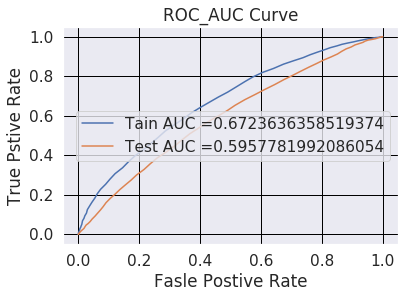

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k1, n_jobs=-1)
neigh.fit(X2_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y2_train_pred = batch_predict(neigh, X2_tr)    
y2_test_pred = batch_predict(neigh, X2_te)

train1_fpr, train1_tpr, tr1_thresholds = roc_curve(y_train, y2_train_pred)
test1_fpr, test1_tpr, te1_thresholds = roc_curve(Y_test, y2_test_pred)

plt.plot(train1_fpr, train1_tpr, label="Tain AUC ="+str(auc(train1_fpr, train1_tpr)))
plt.plot(test1_fpr, test1_tpr, label="Test AUC ="+str(auc(test1_fpr, test1_tpr)))
plt.legend()
plt.xlabel("Fasle Postive Rate")
plt.ylabel("True Pstive Rate")
plt.title("ROC_AUC Curve")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

**Conclusion for SET : 2**

1.   The above Represents the TRP and FPR rates on the either axis and this curve is know as the AUCROC curve , it is a metrix to evaluate the performance of the model. 
2.   As teh grap represents here the  Train Auc = 0.67 , so from this we can conclude that the model is predecting the values with 67 % probabilty.

In [0]:
#this is the custom function for predecting the best thershold and sorting the values according the threshould 
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t



In [0]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.3863135264442865 for threshold 0.505
The Confusion metrix of train data


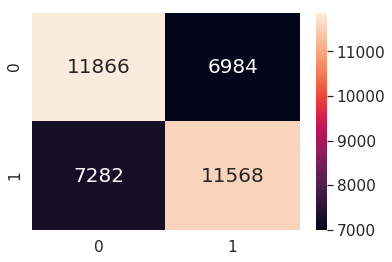

In [0]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr1_thresholds, train1_fpr, train1_tpr)
Confusion_metrix_Train_data = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y2_train_pred, best_t)))
Confusion_metrix_Test_data = pd.DataFrame(confusion_matrix(Y_test, predict_with_best_t(y2_test_pred, best_t)))
import seaborn as sns
sns.set(font_scale=1.4)#for label size
print("The Confusion metrix of train data")
sns.heatmap(Confusion_metrix_Train_data,annot=True, annot_kws={"size": 20},fmt ="g")


The Confusion metrix of test data 


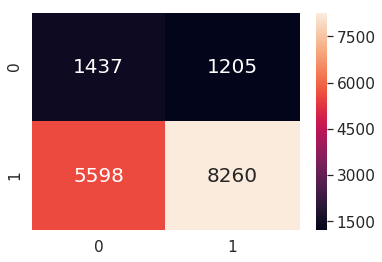

In [0]:
print("The Confusion metrix of test data ")
sns.heatmap(Confusion_metrix_Test_data,annot=True, annot_kws={"size": 20},fmt ="g")


1.   The Ouput Stated above represents the maximun value of TRP (i.e tpr*(1-fpr) "0.3944" corrosponding to whcih the maximum thershold is 0.48 .
2.   The Second output represnts the Confusion metrix Based on the thershold of 0.48 ,  which states that the values below the thershold of 0.48 are classified as 0 and the values above 0.48 are classified as 1.

### 3.3 **Set 3**: Categorical, Numerical features + Project_title(AVG W2V)+ Preprocessed_essay (AVG W2V)

In [0]:
# I am using the predefined word to vector which is pre-trained , hence we use the pickel file to access the file 
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# please review the above link for more information 
# code to import file in google colab form drive 


import gdown

url = 'https://drive.google.com/uc?id=1MqUasf7jYoPbG35MJ28VQcOjjNp-ZDDp'
output = 'glove_vectors'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1MqUasf7jYoPbG35MJ28VQcOjjNp-ZDDp
To: /content/glove_vectors
128MB [00:00, 190MB/s] 


'glove_vectors'

In [0]:
#checking for files are present in the directory we are working or not 
ls

glove_vectors  resources.csv  sample_data/  train_data.csv


In [0]:
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# The code below represents the Avg-word-to-vector of Project tittle .
# here we are calculating the Avg-word to vec for "x_train" . 
x_train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_avg_w2v_vectors.append(vector)

print(len(x_train_avg_w2v_vectors))
print(len(x_train_avg_w2v_vectors[0]))
# print(x_train_avg_w2v_vectors[0])

100%|██████████| 37700/37700 [00:00<00:00, 61949.27it/s]

37700
300


In [0]:
# here we are calculating the Avg-word to vec for "X_CV"
X_cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors.append(vector)

print(len(X_cv_avg_w2v_vectors))
print(len(X_cv_avg_w2v_vectors[0]))
# print(X_cv_avg_w2v_vectors[0])

100%|██████████| 11055/11055 [00:00<00:00, 54683.34it/s]

11055
300


In [0]:
# here we are calculating the Avg-word to vec for "X_test"
X_test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors.append(vector)

print(len(X_test_avg_w2v_vectors))
print(len(X_test_avg_w2v_vectors[0]))
# print(X_cv_avg_w2v_vectors[0])

100%|██████████| 16500/16500 [00:00<00:00, 62645.36it/s]

16500
300


In [0]:
# The code below represents the Avg-word-to-vector of Essay.
# here we are calculating the Avg-word to vec for "x_train" . 
x_train_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_essay_avg_w2v_vectors.append(vector)

print(len(x_train_essay_avg_w2v_vectors))
print(len(x_train_essay_avg_w2v_vectors[0]))
# print(x_train_essay_avg_w2v_vectors[0])

100%|██████████| 37700/37700 [00:15<00:00, 2363.51it/s]

37700
300


In [0]:
# here we are calculating the Avg-word to vec for "X_CV"
X_cv_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v_vectors.append(vector)

print(len(X_cv_essay_avg_w2v_vectors))
print(len(X_cv_essay_avg_w2v_vectors[0]))
# print(X_cv_essay_avg_w2v_vectors[0])

100%|██████████| 11055/11055 [00:04<00:00, 2304.83it/s]

11055
300


In [0]:
# here we are calculating the Avg-word to vec for "X_test"
X_test_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v_vectors.append(vector)

print(len(X_test_essay_avg_w2v_vectors))
print(len(X_test_essay_avg_w2v_vectors[0]))
# print(X_test_essay_avg_w2v_vectors[0])

100%|██████████| 16500/16500 [00:07<00:00, 2307.07it/s]

16500
300


In [0]:
from scipy.sparse import hstack
X3_tr = hstack((x_train_clean_categories_ohe,x_train_clean_subcat_ohe,x_train_teacher_ohe,x_train_state_ohe,\
                x_train_grade_ohe,x_train_price_std,x_train_projects_std,x_train_qty_std,x_train_avg_w2v_vectors,x_train_essay_avg_w2v_vectors)).tocsr()
X3_cv = hstack((X_cv_clean_categories_ohe,X_cv_clean_subcat_ohe,X_cv_teacher_ohe,X_cv_state_ohe,X_cv_grade_ohe,\
                X_cv_price_std,X_cv_projects_std,X_cv_qty_std,X_cv_avg_w2v_vectors,X_cv_essay_avg_w2v_vectors)).tocsr()
X3_te =hstack((X_test_clean_categories_ohe,X_test_clean_subcat_ohe,X_test_teacher_ohe,X_test_state_ohe,\
               X_test_grade_ohe,X_test_price_std,X_test_projects_std,X_test_qty_std,X_test_avg_w2v_vectors,X_test_essay_avg_w2v_vectors)).tocsr()


print("The final Data Matrix for Set:3" , " All the shapes of the data represent the merged features as mentioned in the tittle")
print("shape of X_train is : ",            X3_tr.shape)
print("shape of X_Cross validation is :" , X3_cv.shape)
print("shape of X_test is ",               X3_te.shape)

The final Data Matrix for Set:3  All the shapes of the data represent the merged features as mentioned in the tittle
shape of X_train is :  (37700, 703)
shape of X_Cross validation is : (11055, 703)
shape of X_test is  (16500, 703)


In [0]:
def batch_predict(clf, data):
  y2_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
  # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
  # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
      y2_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
  # we will be predicting for the last data points
  if data.shape[0]%1000 !=0:
      y2_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

  return y2_data_pred

100%|██████████| 5/5 [4:07:55<00:00, 2959.80s/it]


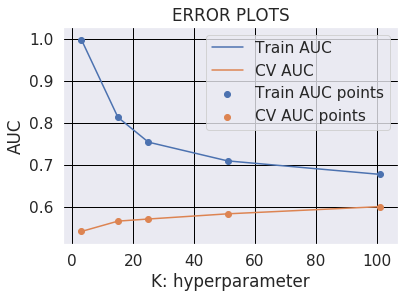

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc2 = []
cv_auc2 = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X3_tr, y_train)

    y2_train_pred = batch_predict(neigh, X3_tr)    
    y2_cv_pred = batch_predict(neigh, X3_cv)

    # roc_auc_score(y_tr, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc2.append(roc_auc_score(y_train,y2_train_pred))
    cv_auc2.append(roc_auc_score(Y_cv, y2_cv_pred))

plt.plot(K, train_auc2, label='Train AUC')
plt.plot(K, cv_auc2, label='CV AUC')

plt.scatter(K, train_auc2, label='Train AUC points')
plt.scatter(K, cv_auc2, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


1.   The error plot above representes the Train AUC and CV AUC Curve,      wherein we choose K(hyperparameter value) such that,it will be the  maximum AUC on cv data and distance between the train-data line("Blue") and CV-line("orange") results be to minimum.
2.   The best value of k is found to be 101
3.   Here I have used the "AUCROC" curve for choosing the best hypermeter as the data is imbalanced(though i have balanced it) , the "AUCROC" curve considers both the class labels equally . 
4.   The other hyperparameter tuning techiniques can also be choosen as "CV" and "K-fold CV"

In [0]:
best_k1 = 101

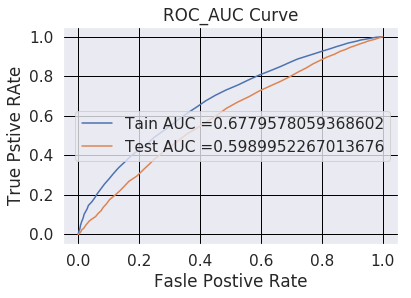

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k1, n_jobs=-1)
neigh.fit(X3_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y3_train_pred = batch_predict(neigh, X3_tr)    
y3_test_pred = batch_predict(neigh, X3_te)

train2_fpr, train2_tpr, tr2_thresholds = roc_curve(y_train, y3_train_pred)
test2_fpr, test2_tpr, te2_thresholds = roc_curve(Y_test, y3_test_pred)

plt.plot(train2_fpr, train2_tpr, label="Tain AUC ="+str(auc(train2_fpr, train2_tpr)))
plt.plot(test2_fpr, test2_tpr, label="Test AUC ="+str(auc(test2_fpr, test2_tpr)))
plt.legend()
plt.xlabel("Fasle Postive Rate")
plt.ylabel("True Pstive RAte")
plt.title("ROC_AUC Curve")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

**Conclusion for SET : 3**

1.   The above Represents the TRP and FPR rates on the either axis and this curve is know as the AUCROC curve , it is a metrix to evaluate the performance of the model. 
2.   As teh grap represents here the  Train Auc = 0.67 , so from this we can conclude that the model is predecting the values with 67 % probabilty.


In [0]:
#this is the custom function for predecting the best thershold and sorting the values according the threshould 
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [0]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.39373697978596905 for threshold 0.495
The Confusion metrix of train data


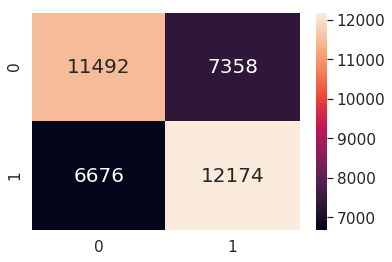

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr2_thresholds, train2_fpr, train2_tpr)
Confusion_metrix_Train_data = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y3_train_pred, best_t)))
Confusion_metrix_Test_data = pd.DataFrame(confusion_matrix(Y_test, predict_with_best_t(y3_test_pred, best_t)))
import seaborn as sns
sns.set(font_scale=1.4)#for label size
print("The Confusion metrix of train data")
sns.heatmap(Confusion_metrix_Train_data,annot=True, annot_kws={"size": 20},fmt ="g")


The Confusion metrix of test data 


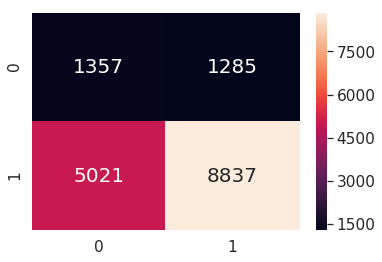

In [0]:
print("The Confusion metrix of test data ")
sns.heatmap(Confusion_metrix_Test_data,annot=True, annot_kws={"size": 20},fmt ="g")

1.   The Ouput Stated above represents the maximun value of TRP (i.e tpr*(1-fpr) "0.401" corrosponding to whcih the maximum thershold is 0.48 .
2.   The Second output represnts the Confusion metrix Based on the thershold of 0.48 ,  which states that the values below the thershold of 0.48 are classified as 0 and the values above 0.48 are classified as 1.

### 3.4 **Set 4**: Categorical, Numerical features + Project_title(TFIDF W2V)+ Preprocessed_essay (TFIDF W2V)

In [0]:
# TFIDF W2V of x_train "essays"
x_train_tfidf_model = TfidfVectorizer()
x_train_tfidf_model.fit(x_train["essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(x_train_tfidf_model.get_feature_names(), list(x_train_tfidf_model.idf_)))
tfidf_words = set(x_train_tfidf_model.get_feature_names())

In [0]:
x_train1_tfidf_model = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train1_tfidf_model.append(vector)

print(len(x_train1_tfidf_model))
print(len(x_train1_tfidf_model[0]))

100%|██████████| 37700/37700 [02:25<00:00, 258.98it/s]

37700
300


In [0]:
# TFIDF W2V of X_CV "essays" 
# here alos we will fit in the train data only as we dont want our data to be leacked  
X_cv_tfidf_model = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_model.append(vector)

print(len(X_cv_tfidf_model))
print(len(X_cv_tfidf_model[0]))

100%|██████████| 11055/11055 [00:44<00:00, 275.15it/s]

11055
300


In [0]:
X_test_tfidf_model = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_model.append(vector)

print(len(X_test_tfidf_model))
print(len(X_test_tfidf_model[0]))

100%|██████████| 16500/16500 [01:06<00:00, 247.71it/s]

16500
300


In [0]:
# TFIDF W2V of x_train "essays"
x_train_tfidf_model1 = TfidfVectorizer()
x_train_tfidf_model1.fit(x_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(x_train_tfidf_model1.get_feature_names(), list(x_train_tfidf_model.idf_)))
tfidf_words = set(x_train_tfidf_model1.get_feature_names())

In [0]:
x_train_tfidf_clean_titles_model = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_clean_titles_model.append(vector)

print(len(x_train_tfidf_clean_titles_model))
print(len(x_train_tfidf_clean_titles_model[0]))

100%|██████████| 37700/37700 [00:01<00:00, 21114.92it/s]

37700
300


In [0]:
X_cv_tfidf_clean_titles_model = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_clean_titles_model.append(vector)

print(len(X_cv_tfidf_clean_titles_model))
print(len(X_cv_tfidf_clean_titles_model[0]))

100%|██████████| 11055/11055 [00:00<00:00, 29339.00it/s]

11055
300


In [0]:
X_test_tfidf_clean_titles_model = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_clean_titles_model.append(vector)

print(len(X_test_tfidf_clean_titles_model))
print(len(X_test_tfidf_clean_titles_model[0]))

100%|██████████| 16500/16500 [00:00<00:00, 30151.75it/s]

16500
300


In [0]:
from scipy.sparse import hstack
X4_tr = hstack((x_train_clean_categories_ohe,x_train_clean_subcat_ohe,x_train_teacher_ohe,x_train_state_ohe,\
                x_train_grade_ohe,x_train_price_std,x_train_projects_std,x_train_qty_std,x_train1_tfidf_model, x_train_tfidf_clean_titles_model)).tocsr()
X4_cv = hstack((X_cv_clean_categories_ohe,X_cv_clean_subcat_ohe,X_cv_teacher_ohe,X_cv_state_ohe,X_cv_grade_ohe,\
                X_cv_price_std,X_cv_projects_std,X_cv_qty_std,X_cv_tfidf_model,X_cv_tfidf_clean_titles_model)).tocsr()
X4_te =hstack((X_test_clean_categories_ohe,X_test_clean_subcat_ohe,X_test_teacher_ohe,X_test_state_ohe,\
               X_test_grade_ohe,X_test_price_std,X_test_projects_std,X_test_qty_std,X_test_tfidf_model,X_test_tfidf_clean_titles_model)).tocsr()


print("The final Data Matrix for Set:4" , " All the shapes of the data represent the merged features as mentioned in the tittle")
print("shape of X_train is : ",            X4_tr.shape)
print("shape of X_Cross validation is :" , X4_cv.shape)
print("shape of X_test is ",               X4_te.shape)

The final Data Matrix for Set:4  All the shapes of the data represent the merged features as mentioned in the tittle
shape of X_train is :  (37700, 703)
shape of X_Cross validation is : (11055, 703)
shape of X_test is  (16500, 703)


In [0]:
def batch_predict(clf, data):
  y3_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
  # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
  # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
      y3_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
  # we will be predicting for the last data points
  if data.shape[0]%1000 !=0:
      y3_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

  return y3_data_pred

100%|██████████| 5/5 [3:55:56<00:00, 2832.93s/it]


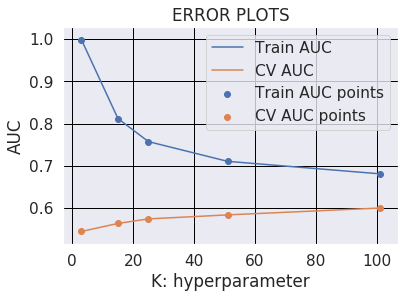

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc3 = []
cv_auc3 = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X4_tr, y_train)

    y3_train_pred = batch_predict(neigh, X4_tr)    
    y3_cv_pred = batch_predict(neigh, X4_cv)

    # roc_auc_score(y_tr, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc3.append(roc_auc_score(y_train,y3_train_pred))
    cv_auc3.append(roc_auc_score(Y_cv, y3_cv_pred))

plt.plot(K, train_auc3, label='Train AUC')
plt.plot(K, cv_auc3, label='CV AUC')

plt.scatter(K, train_auc3, label='Train AUC points')
plt.scatter(K, cv_auc3, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

1.   The error plot above representes the Train AUC and CV AUC Curve,      wherein we choose K(hyperparameter value) such that,it will be the  maximum AUC on cv data and distance between the train-data line("Blue") and CV-line("orange") results be to minimum.
2.   The best value of k is found to be 102
3.   Here I have used the "AUCROC" curve for choosing the best hypermeter as the data is imbalanced(though i have balanced it) , the "AUCROC" curve considers both the class labels equally . 
4.   The other hyperparameter tuning techiniques can also be choosen as "CV" and "K-fold CV"

In [0]:
best_k2= 101

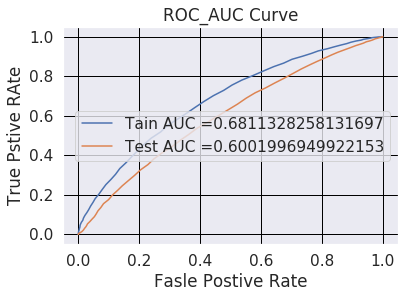

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k2, n_jobs=-1)
neigh.fit(X4_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y4_train_pred = batch_predict(neigh, X4_tr)    
y4_test_pred = batch_predict(neigh, X4_te)

train3_fpr, train3_tpr, tr3_thresholds = roc_curve(y_train, y4_train_pred)
test3_fpr, test3_tpr, te3_thresholds = roc_curve(Y_test, y4_test_pred)

plt.plot(train3_fpr, train3_tpr, label="Tain AUC ="+str(auc(train3_fpr, train3_tpr)))
plt.plot(test3_fpr, test3_tpr, label="Test AUC ="+str(auc(test3_fpr, test3_tpr)))
plt.legend()
plt.xlabel("Fasle Postive Rate")
plt.ylabel("True Pstive RAte")
plt.title("ROC_AUC Curve")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


**Conclusion for SET : 4**

1.   The above Represents the TRP and FPR rates on the either axis and this curve is know as the AUCROC curve , it is a metrix to evaluate the performance of the model. 
2.   As teh grap represents here the  Train Auc = 0.67 , so from this we can conclude that the model is predecting the values with 67 % probabilty.

In [0]:
#this is the custom function for predecting the best thershold and sorting the values according the threshould 
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [0]:

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.39602255697289085 for threshold 0.495
The Confusion metrix of train data


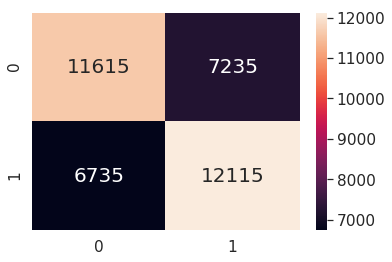

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr3_thresholds, train3_fpr, train3_tpr)
Confusion_metrix_Train_data = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y4_train_pred, best_t)))
Confusion_metrix_Test_data = pd.DataFrame(confusion_matrix(Y_test, predict_with_best_t(y4_test_pred, best_t)))
import seaborn as sns
sns.set(font_scale=1.4)#for label size
print("The Confusion metrix of train data")
sns.heatmap(Confusion_metrix_Train_data,annot=True, annot_kws={"size": 20},fmt ="g")

The Confusion metrix of test data 


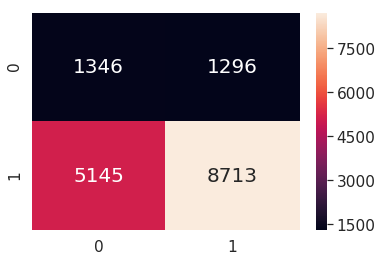

In [0]:
print("The Confusion metrix of test data ")
sns.heatmap(Confusion_metrix_Test_data,annot=True, annot_kws={"size": 20},fmt ="g")

1.   The Ouput Stated above represents the maximun value of TRP (i.e tpr*(1-fpr) "0.3939" corrosponding to whcih the maximum thershold is 0.45 .
2.   The Second output represnts the Confusion metrix Based on the thershold of 0.45 ,  which states that the values below the thershold of 0.45 are classified as 0 and the values above 0.48 are classified as 1.

## 3.5  Applying the SelectKBest for selecting the Top best 2000 features on the set2 of the Data matrix **bold text**

This data metrix consits of Set 2: Categorical, Numerical features + Project_title(TFIDF)+ Preprocessed_essay (TFIDF)

In [0]:
# Preprocessed_essay (TFIDF) and selcting the best 2000 Features using the  SelectKBest, chi2
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_tfidf = vectorizer.transform(x_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)


#Selecting top 2000 best features from the generated tfidf features
selector = SelectKBest(chi2, k = 2000 )
selector.fit(x_train_essay_tfidf,y_train)
x_train_essay_2000 = selector.transform(x_train_essay_tfidf)
X_cv_essay_2000 = selector.transform(X_cv_essay_tfidf)
X_test_essay_2000 = selector.transform(X_test_essay_tfidf)
print(x_train_essay_2000.shape)
print(X_cv_essay_2000.shape)
print(X_test_essay_2000.shape)

(37700, 2000)
(11055, 2000)
(16500, 2000)
CPU times: user 17.8 s, sys: 44 ms, total: 17.9 s
Wall time: 17.9 s


In [0]:
# Project_title(TFIDF) and selcting the best 2000 Features using the  SelectKBest, chi2
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_titles_tfidf = vectorizer.transform(x_train['clean_titles'].values)
X_cv_clean_titles_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_clean_titles_tfidf = vectorizer.transform(X_test['clean_titles'].values)


#Selecting top 2000 best features from the generated tfidf features
selector = SelectKBest(chi2, k = 1811 )
selector.fit(x_train_clean_titles_tfidf,y_train)
x_train_clean_titles_2000 = selector.transform(x_train_clean_titles_tfidf)
X_cv_clean_titles_2000 = selector.transform(X_cv_clean_titles_tfidf)
X_test_clean_titles_2000 = selector.transform(X_test_clean_titles_tfidf)
print(x_train_clean_titles_2000.shape)
print(X_cv_clean_titles_2000.shape)
print(X_test_clean_titles_2000.shape)

(37700, 1811)
(11055, 1811)
(16500, 1811)
CPU times: user 603 ms, sys: 2 ms, total: 605 ms
Wall time: 607 ms


In [0]:
#now merging all the data matrix 
from scipy.sparse import hstack
X5_tr = hstack((x_train_clean_categories_ohe,x_train_clean_subcat_ohe,x_train_teacher_ohe,x_train_state_ohe,\
                x_train_grade_ohe,x_train_price_std,x_train_projects_std,x_train_qty_std,x_train_essay_2000,x_train_clean_titles_2000)).tocsr()
X5_cv = hstack((X_cv_clean_categories_ohe,X_cv_clean_subcat_ohe,X_cv_teacher_ohe,X_cv_state_ohe,\
                X_cv_grade_ohe,X_cv_price_std,X_cv_projects_std,X_cv_qty_std,X_cv_essay_2000,X_cv_clean_titles_2000)).tocsr()
X5_te =hstack((X_test_clean_categories_ohe,X_test_clean_subcat_ohe,X_test_teacher_ohe,X_test_state_ohe,\
               X_test_grade_ohe,X_test_price_std,X_test_projects_std,X_test_qty_std,X_test_essay_2000,X_test_clean_titles_2000)).tocsr()


print("The final Data Matrix for Set:3" , " All the shapes of the data represent the merged features as mentioned in the tittle")
print("shape of X_train is : ",            X5_tr.shape)
print("shape of X_Cross validation is :" , X5_cv.shape)
print("shape of X_test is ",               X5_te.shape)

The final Data Matrix for Set:3  All the shapes of the data represent the merged features as mentioned in the tittle
shape of X_train is :  (37700, 3914)
shape of X_Cross validation is : (11055, 3914)
shape of X_test is  (16500, 3914)


In [0]:
def batch_predict(clf, data):
  y4_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
  # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
  # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
      y4_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
  # we will be predicting for the last data points
  if data.shape[0]%1000 !=0:
      y4_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

  return y4_data_pred

100%|██████████| 5/5 [10:03<00:00, 120.33s/it]


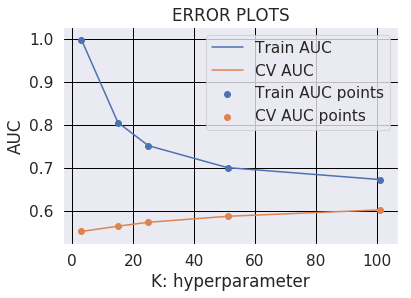

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc4 = []
cv_auc4 = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X5_tr, y_train)

    y4_train_pred = batch_predict(neigh, X5_tr)    
    y4_cv_pred = batch_predict(neigh, X5_cv)

    # roc_auc_score(y_tr, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc4.append(roc_auc_score(y_train,y4_train_pred))
    cv_auc4.append(roc_auc_score(Y_cv, y4_cv_pred))

plt.plot(K, train_auc4, label='Train AUC')
plt.plot(K, cv_auc4, label='CV AUC')

plt.scatter(K, train_auc4, label='Train AUC points')
plt.scatter(K, cv_auc4, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


1.   The error plot above representes the Train AUC and CV AUC Curve,      wherein we choose K(hyperparameter value) such that,it will be the  maximum AUC on cv data and distance between the train-data line("Blue") and CV-line("orange") results be to minimum.
2.   The best value of k is found to be 100
3.   Here I have used the "AUCROC" curve for choosing the best hypermeter as the data is imbalanced(though i have balanced it) , the "AUCROC" curve considers both the class labels equally . 
4.   The other hyperparameter tuning techiniques can also be choosen as "CV" and "K-fold CV"

In [0]:
best_k2= 101

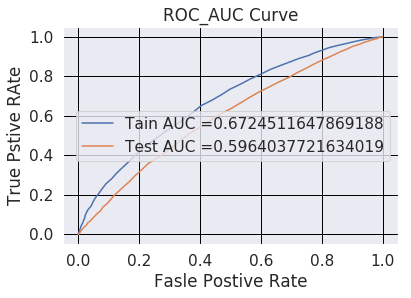

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k2, n_jobs=-1)
neigh.fit(X5_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y5_train_pred = batch_predict(neigh, X5_tr)    
y5_test_pred = batch_predict(neigh, X5_te)

train5_fpr, train5_tpr, tr5_thresholds = roc_curve(y_train, y5_train_pred)
test5_fpr, test5_tpr, te5_thresholds = roc_curve(Y_test, y5_test_pred)

plt.plot(train5_fpr, train5_tpr, label="Tain AUC ="+str(auc(train5_fpr, train5_tpr)))
plt.plot(test5_fpr, test5_tpr, label="Test AUC ="+str(auc(test5_fpr, test5_tpr)))
plt.legend()
plt.xlabel("Fasle Postive Rate")
plt.ylabel("True Pstive RAte")
plt.title("ROC_AUC Curve")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


**Conclusion for SET : 5**

1.   The above Represents the TRP and FPR rates on the either axis and this curve is know as the AUCROC curve , it is a metrix to evaluate the performance of the model. 
2.   As teh grap represents here the  Train Auc = 0.67 , so from this we can conclude that the model is predecting the values with 67 % probabilty.


In [0]:
#this is the custom function for predecting the best thershold and sorting the values according the threshould 
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [0]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.38854513857129785 for threshold 0.475
The Confusion metrix of train data


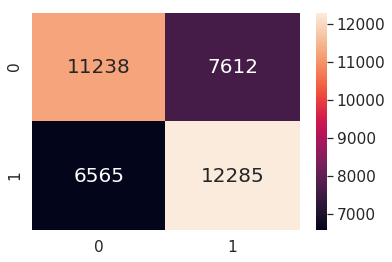

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr5_thresholds, train5_fpr, train5_tpr)
Confusion_metrix_Train_data = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y5_train_pred, best_t)))
Confusion_metrix_Test_data = pd.DataFrame(confusion_matrix(Y_test, predict_with_best_t(y5_test_pred, best_t)))
import seaborn as sns
sns.set(font_scale=1.4)#for label size
print("The Confusion metrix of train data")
sns.heatmap(Confusion_metrix_Train_data,annot=True, annot_kws={"size": 20},fmt ="g")

The Confusion metrix of test data 


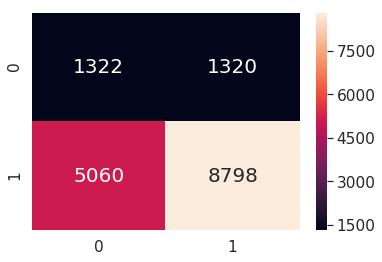

In [0]:
print("The Confusion metrix of test data ")
sns.heatmap(Confusion_metrix_Test_data,annot=True, annot_kws={"size": 20},fmt ="g")

1.   The Ouput Stated above represents the maximun value of TRP (i.e tpr*(1-fpr) "0.3973" corrosponding to whcih the maximum thershold is 0.49 .
2.   The Second output represnts the Confusion metrix Based on the thershold of 0.49 ,  which states that the values below the thershold of 0.49 are classified as 0 and the values above 0.49 are classified as 1.

In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Hyperparameter", "AUC"]
x.add_row(["SET 1 : project_title(BOW) + preprocessed_essay (BOW)", 101 ,  0.55])
x.add_row(["SET 2 : project_title(TFIDF)+ preprocessed_essay (TFIDF)", 101 , 0.59 ])
x.add_row(["SET 3 :  project_title(AVG W2V)+ preprocessed_essay (AVG W2V)", 101, 0.59])
x.add_row(["SET 4 : project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)", 101, 0.60])
x.add_row(["SET 5 : project_title(TFIDF)+ preprocessed_essay (TFIDF) of 2000 Words", 100, 0.59])

print(x)

+------------------------------------------------------------------------+----------------+------+
|                               Vectorizer                               | Hyperparameter | AUC  |
+------------------------------------------------------------------------+----------------+------+
|         SET 1 : project_title(BOW) + preprocessed_essay (BOW)          |      101       | 0.55 |
|        SET 2 : project_title(TFIDF)+ preprocessed_essay (TFIDF)        |      101       | 0.59 |
|     SET 3 :  project_title(AVG W2V)+ preprocessed_essay (AVG W2V)      |      101       | 0.59 |
|    SET 4 : project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)    |      101       | 0.6  |
| SET 5 : project_title(TFIDF)+ preprocessed_essay (TFIDF) of 2000 Words |      100       | 0.59 |
+------------------------------------------------------------------------+----------------+------+
